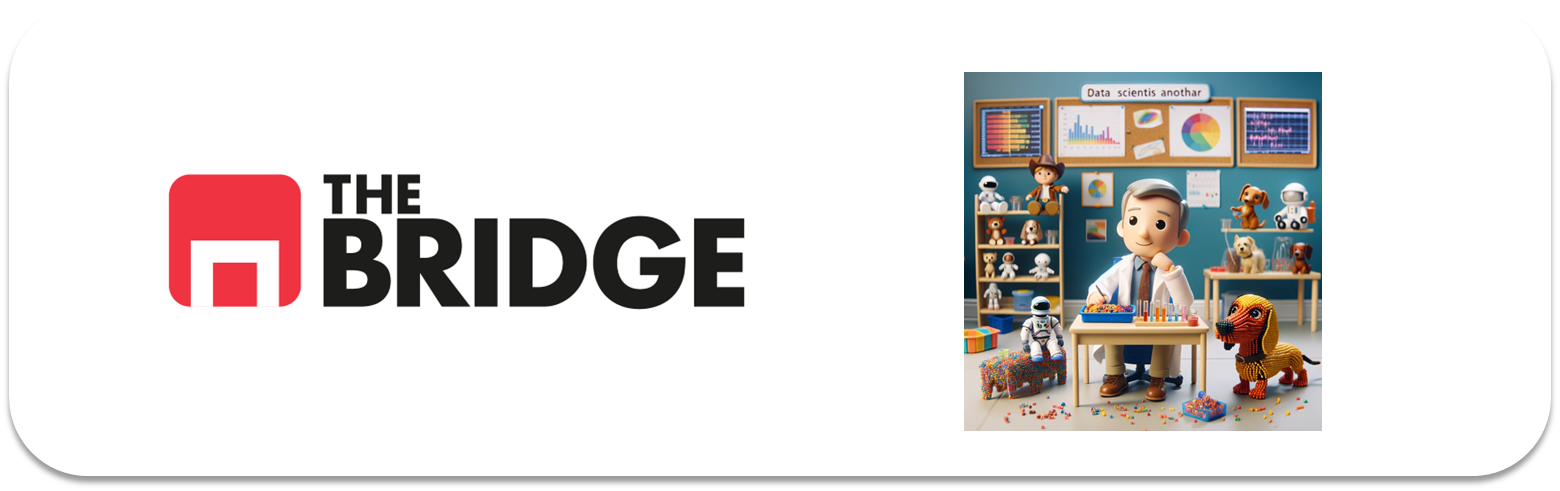

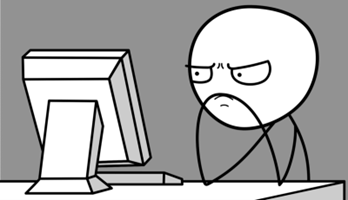

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
from bootcampviztools import *


### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [20]:
7.332/100 * 18.8

1.378416

In [6]:
df = pd.read_csv("./data/car_crashes.csv", sep="|", index_col=0)
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehñculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles ($)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)


|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|total|Número de accidentes fatales por colisión de vehículos por mil millones de millas|Numérica Continua|0||
|speeding|Cuántos superaban la velocidad|Numérica Continua|0||
|alcohol|Cuántos superaban la tasa de alcohol permitida|Numérica Continua|0||
|not_distracted|Cuántos no estaban distraídos|Numérica Continua|2||
|no_previous|Para cuántos esta fue la primera vez |Numérica Continua|2||
|ins_premium|Prima media de Seguros de Automóviles ($)|Numérica Continua|1||
|ins_losses|Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)|Numérica Continua|1||
|abbreb|Abreviatura del estado|Categórica|0||

### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [15]:
df_original = df.copy()

In [28]:
df = df_original.copy()

In [29]:
df.iloc[:, 1:-3] = df.iloc[:, 1:-3].apply(lambda col: (col/100) * df.iloc[:, 0], axis=0)

In [ ]:
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,1.378416,1.060320,3.393024,2.827520,784.55,145.08,AL
1,18.1,1.343201,0.819025,2.948490,3.079534,1053.48,133.93,AK
2,18.6,1.210860,0.968688,2.906064,3.321216,899.47,110.35,AZ
3,22.4,0.903168,1.304576,4.716544,4.766720,827.34,142.39,AR
4,12.0,0.504000,0.403200,1.310400,1.281600,878.41,165.63,CA


In [32]:
df_estadisticos = df.describe().T

In [ ]:
df_estadisticos["IQR"] = df_estadisticos["75%"] - df_estadisticos["25%"]
df_estadisticos

,count,mean,std,min,25%,50%,75%,max,IQR
total,51.0,15.790196,4.122002,5.900000,12.750000,15.600000,18.500000,23.900000,5.750000
speeding,51.0,0.839091,0.490598,0.118354,0.480636,0.684352,1.188788,2.170598,0.708152
alcohol,51.0,0.831211,0.495077,0.093987,0.484099,0.691488,1.040076,2.399082,0.555977
not_distracted,51.0,2.294026,1.291113,0.309760,1.240536,2.064693,3.008158,5.654979,1.767622
no_previous,51.0,2.356869,1.165110,0.348100,1.502699,2.177364,3.088813,4.928028,1.586114
ins_premium,51.0,886.957647,178.296285,641.960000,768.430000,858.970000,1007.945000,1301.520000,239.515000
ins_losses,51.0,134.493137,24.835922,82.750000,114.645000,136.050000,151.870000,194.780000,37.225000


### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

In [47]:
df.columns.rename(('total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'state'), inplace=True)

In [57]:
df.columns = ['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
              'ins_premium', 'ins_losses', 'state']

In [58]:
df

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state
0,18.8,1.378416,1.060320,3.393024,2.827520,784.55,145.08,AL
1,18.1,1.343201,0.819025,2.948490,3.079534,1053.48,133.93,AK
2,18.6,1.210860,0.968688,2.906064,3.321216,899.47,110.35,AZ
3,22.4,0.903168,1.304576,4.716544,4.766720,827.34,142.39,AR
4,12.0,0.504000,0.403200,1.310400,1.281600,878.41,165.63,CA
5,13.6,0.684352,0.517888,1.461184,1.757120,835.50,139.91,CO
6,10.8,0.536544,0.419904,1.014768,0.956448,1068.73,167.02,CT
7,16.2,0.997272,0.787320,2.283228,2.598156,1137.87,151.48,DE
8,5.9,0.118354,0.093987,0.348100,0.348100,1273.89,136.05,DC
9,17.9,0.672861,0.929189,2.947772,3.011854,1160.13,144.18,FL


Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

In [59]:
def cv(df):
    df_estadisticos = df.describe().T
    df_estadisticos["IQR"] = df_estadisticos["75%"] - df_estadisticos["25%"]
    df_estadisticos["CV"] = df_estadisticos["std"]/df_estadisticos["mean"]
    return df_estadisticos

### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [60]:
cv(df["speeding"])

count    51.000000
mean      0.839091
std       0.490598
min       0.118354
25%       0.480636
50%       0.684352
75%       1.188788
max       2.170598
IQR       0.708152
CV        0.584678
Name: speeding, dtype: float64

> un CV del 58% muestra una alta variabilidad de los datos

(2,)


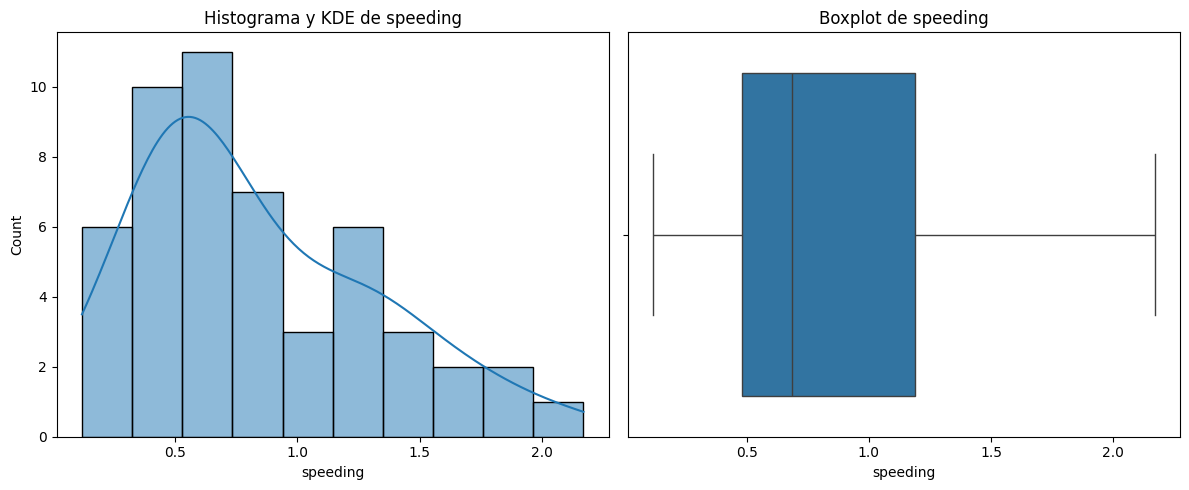

In [66]:
plot_combined_graphs(df, ["speeding"], bins=10)

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [64]:
cv(df["alcohol"])

count    51.000000
mean      0.831211
std       0.495077
min       0.093987
25%       0.484099
50%       0.691488
75%       1.040076
max       2.399082
IQR       0.555977
CV        0.595609
Name: alcohol, dtype: float64

(2,)


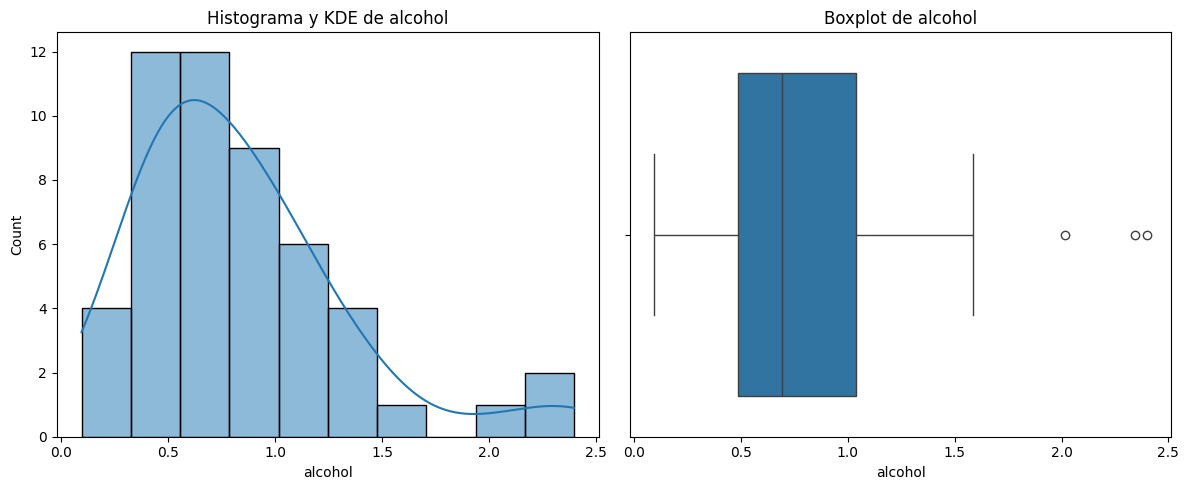

In [69]:
plot_combined_graphs(df, ["alcohol"], bins=10)

### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [70]:
cv(df["not_distracted"])

count    51.000000
mean      2.294026
std       1.291113
min       0.309760
25%       1.240536
50%       2.064693
75%       3.008158
max       5.654979
IQR       1.767622
CV        0.562815
Name: not_distracted, dtype: float64

(2,)


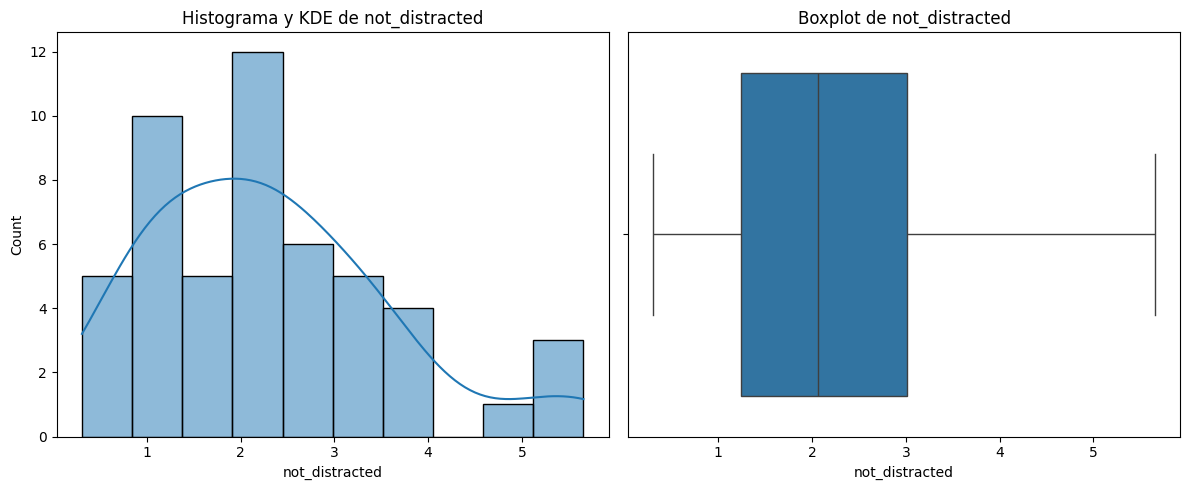

In [73]:
plot_combined_graphs(df, ["not_distracted"], bins=10)

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

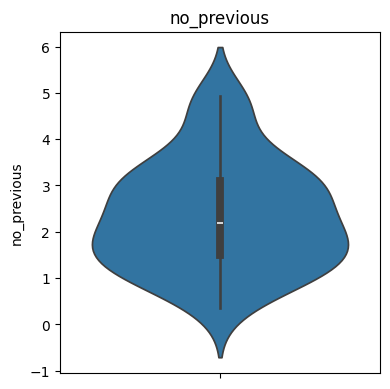

In [74]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df, ["no_previous"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

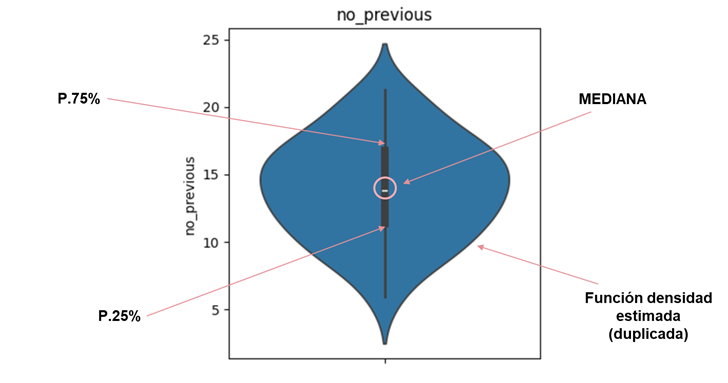

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [75]:
cv(df["no_previous"])

count    51.000000
mean      2.356869
std       1.165110
min       0.348100
25%       1.502699
50%       2.177364
75%       3.088813
max       4.928028
IQR       1.586114
CV        0.494346
Name: no_previous, dtype: float64

(2,)


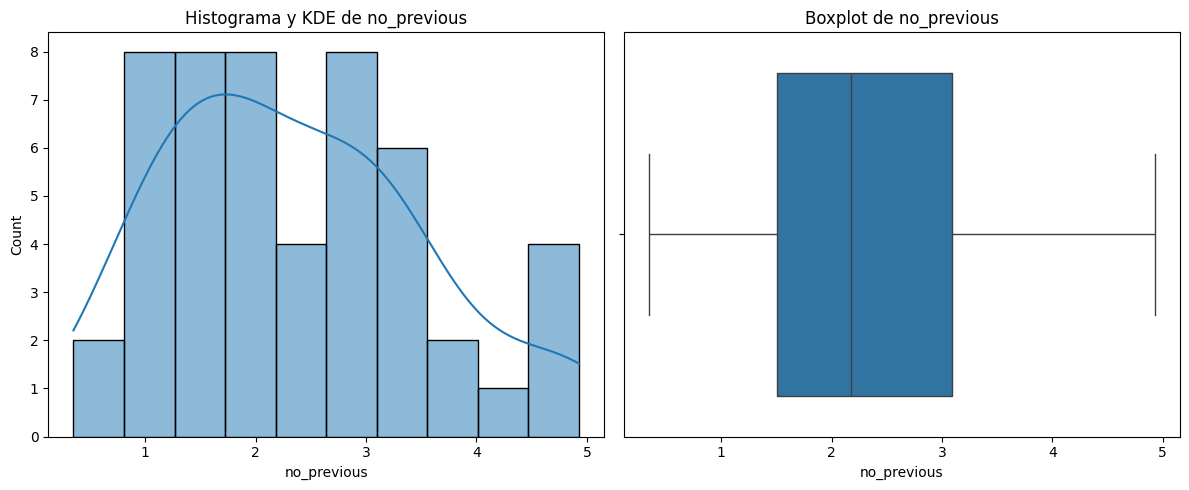

In [78]:
plot_combined_graphs(df, ["no_previous"], bins=10)

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [79]:
df_seguros = pd.read_csv("./data/Marketing-Customer-Analysis.csv")
df_seguros

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


(2,)


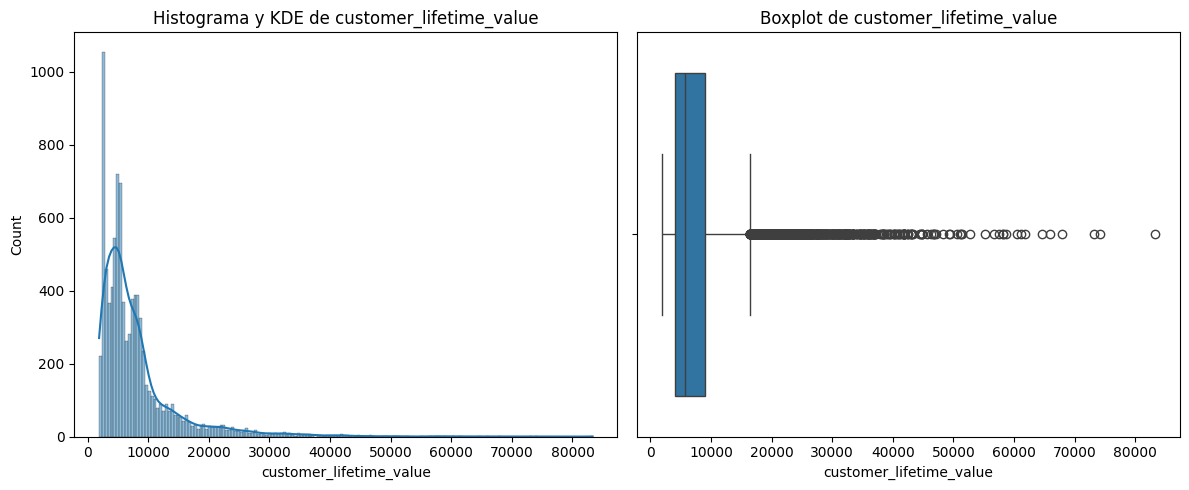

In [81]:
plot_combined_graphs(df_seguros, ["customer_lifetime_value"])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

>20.000

In [87]:
df_less_20 = df_seguros[df_seguros["customer_lifetime_value"] < 30000]

In [88]:
df_over_20 = df_seguros[df_seguros["customer_lifetime_value"] >= 30000]

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

(2,)


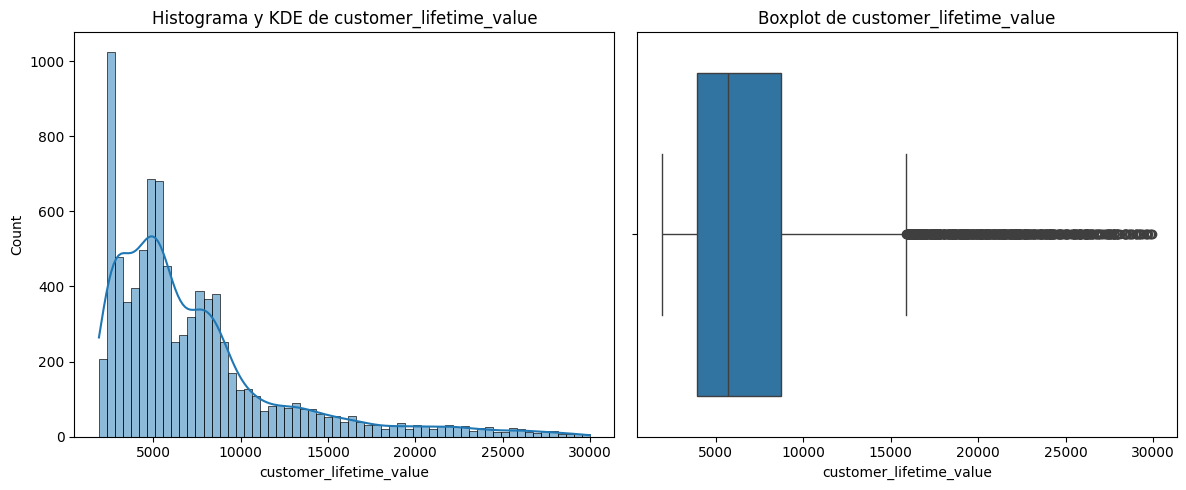

In [89]:
plot_combined_graphs(df_less_20, ["customer_lifetime_value"])

(2,)


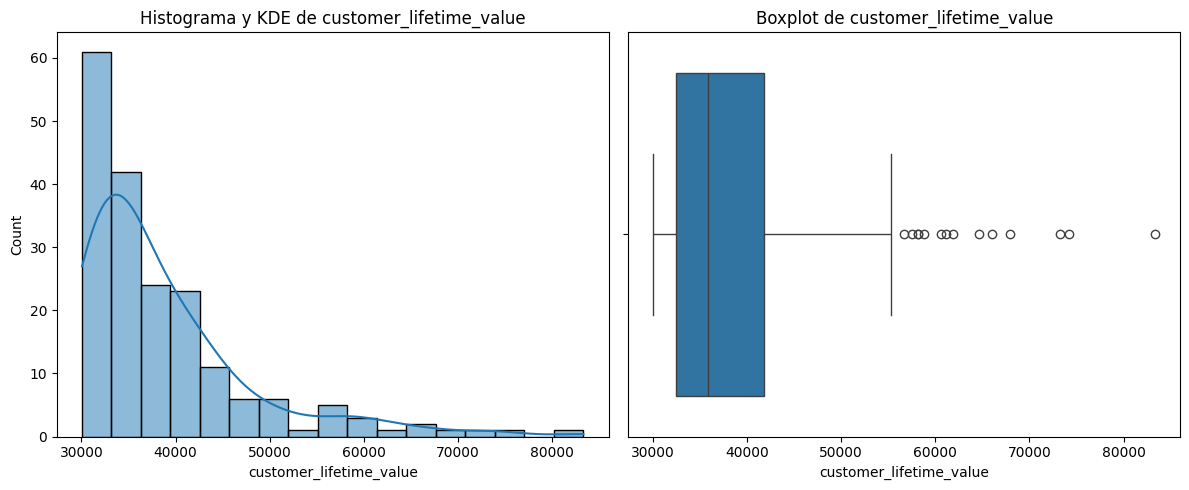

In [90]:
plot_combined_graphs(df_over_20, ["customer_lifetime_value"])